In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [3]:
# write your code for task 0 here
data = pd.read_csv("../data/adult.csv")
data.info()
data.replace("?", np.nan, inplace=True)
data.info()
salary_higher = (data["salary"] == "<=50") & (data["salary K$"] > 50)
salary_lower = (data["salary"] == ">50") & (data["salary K$"] <= 50)
data.loc[salary_higher, "salary"] = ">50"
data.loc[salary_lower, "salary"] = "<=50"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  salary          32561 non-null  object
 12  salary K$       32561 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          -------

# Task 1
Print the count of men and women in the dataset.

In [4]:
# write your code for task 1 here
data["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [5]:
# write your code for task 2 here
data.groupby("sex")["age"].mean().get("Male", 0)

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [6]:
# write your code for task 3 here
%time (data["native-country"].value_counts().get("Poland", 0) / len(data)) * 100

CPU times: total: 0 ns
Wall time: 2 ms


0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [18]:
# write your code for task 4 here
pd.DataFrame(
    {
        "Mean age": data.groupby("salary")["age"].mean(),
        "Std Age": data.groupby("salary")["age"].std(),
    }
)

,Mean age,Std Age
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [35]:
# write your code for task 5 here
higher_edu = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
mask = ~(data["education"].isin(higher_edu)) & (data["salary"] == ">50K")
f"There are {data[mask].size} people that do not have higher education and have salary > 50K$"

'There are 42978 people that do not have higher education and have salary > 50K$'

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [28]:
# write your code for task 6 here
data.groupby("age")["education"].describe()

,count,unique,top,freq
age,,,,
17,395,8,11th,180
18,550,9,11th,166
19,712,13,Some-college,329
20,753,14,Some-college,413
21,720,14,Some-college,372
...,...,...,...,...
85,3,2,HS-grad,2
86,1,1,Masters,1
87,1,1,HS-grad,1


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [29]:
# write your code for task 7 here
married_mask = (data["marital-status"].str.startswith("Married")) & (data["sex"] == "Male")
pd.DataFrame(
    {
        "Married salary": data[married_mask].groupby("salary").size(),
        "Non-married salary": data[~married_mask].groupby("salary").size(),
    }
)


,Married salary,Non-married salary
salary,,
<=50K,7576,17144
>50K,5965,1876


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [36]:
# write your code for task 8 here
max_hours = data["hours-per-week"].max()
data[data["hours-per-week"] == max_hours].size

1105

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

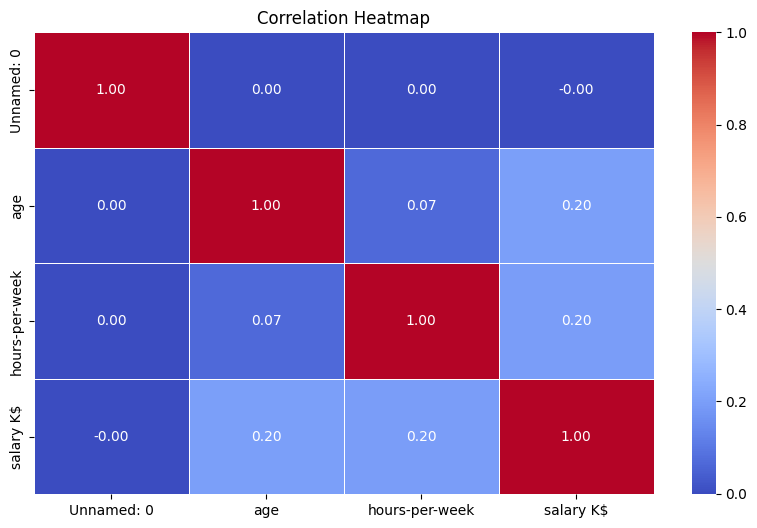

In [44]:
# write your code for task 9 here
# Version for numerical-only columns
correlation = data.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

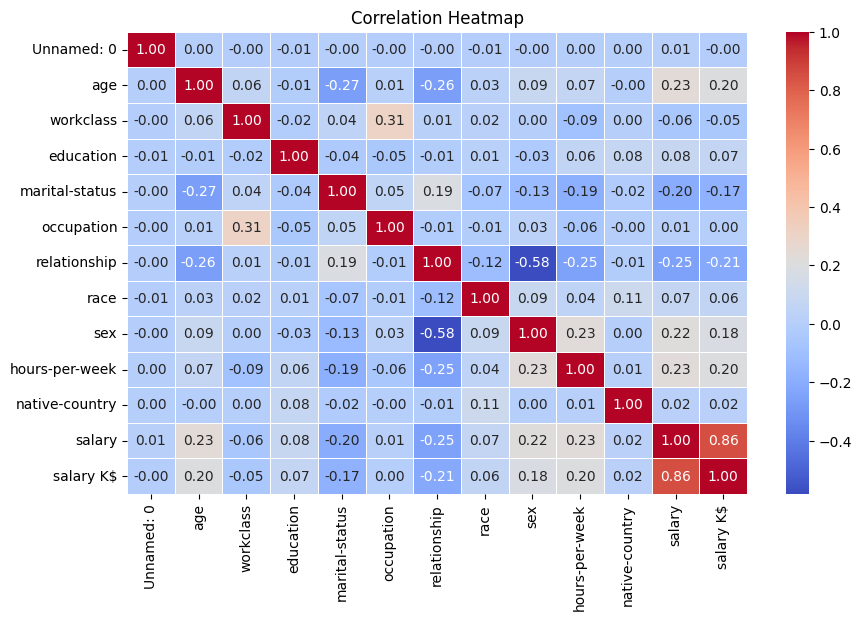

In [47]:
# write your code for task 9 here
# Version for all columns
alpha_columns = data.select_dtypes(include=["object"]).columns

label_encoder = LabelEncoder()
for col in alpha_columns:
    data[col] = label_encoder.fit_transform(data[col])

correlation = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()